In [1]:
# loading libraries
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(reshape)
library("reshape2")


Warning message:
"package 'dplyr' was built under R version 3.6.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v purrr   0.3.3
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'tidyr' was built under R version 3.6.2"
Warning message:
"package 'purrr' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'reshape'


The following objects are masked from 'package:tidyr':

    expand, smiths


The following object is masked from 'package:dplyr':

    rename





In [10]:
getwd()

[1] "C:/Users/61423/OneDrive/Desktop/SEM 3/DVN/AT3/AGRI INVESTOR"

In [11]:
setwd("C:/Users/61423/OneDrive/Desktop/SEM 3/DVN/AT3/AGRI INVESTOR")

In [12]:
forest <- read_excel("bushfire_damage.xlsx") 
forest

State,Conservation,Forests/Plantation,Agriculture,Intensive residential/commercial,Rural residential/commercial,Total,Fatalitites,Homes Lost
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ACT,83500,269,3114,0,0,86833,1,0
QLD,1042793,121572,1633130,2440,1116,2801050,0,48
NSW,2557544,749410,558878,25460,3121,3894413,25,2439
SA,153010,23916,98966,3807,1706,281405,3,151
TAS,18478,12505,825,67,290,32165,0,2
VIC,450163,874327,163422,6299,13894,1508105,5,396
Total,4305488,1781999,2458334,38073,20127,8603971,34,3000+


In [15]:
# Rename some columns
colnames(forest)[3] <- "Forests"
colnames(forest)[5] <- "Intensive_residential"
colnames(forest)[6] <- "rural_residential"
colnames(forest)[9] <- "homes_lost"
forest


# convert dbl to numeric
forest$Agriculture= as.numeric(forest$Agriculture)


State,Conservation,Forests,Agriculture,Intensive_residential,rural_residential,Total,Fatalitites,homes_lost
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ACT,83500,269,3114,0,0,86833,1,0
QLD,1042793,121572,1633130,2440,1116,2801050,0,48
NSW,2557544,749410,558878,25460,3121,3894413,25,2439
SA,153010,23916,98966,3807,1706,281405,3,151
TAS,18478,12505,825,67,290,32165,0,2
VIC,450163,874327,163422,6299,13894,1508105,5,396
Total,4305488,1781999,2458334,38073,20127,8603971,34,3000+


In [ ]:
total_forests<-ggplot(data=forest,
          mapping= aes(x= State, fill=))

In [37]:
land_damaged<- forest %>% select(State, Conservation, Forests, Agriculture, Intensive_residential, rural_residential)
land_damaged

State,Conservation,Forests,Agriculture,Intensive_residential,rural_residential
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACT,83500,269,3114,0,0
QLD,1042793,121572,1633130,2440,1116
NSW,2557544,749410,558878,25460,3121
SA,153010,23916,98966,3807,1706
TAS,18478,12505,825,67,290
VIC,450163,874327,163422,6299,13894
Total,4305488,1781999,2458334,38073,20127


In [23]:
damage<-  melt(land_damaged, id="State") # convert to long format
colnames(damage)[2] <- "Land_type"
#damage

In [35]:
p<-ggplot(data=damage,
          mapping= aes(x= State, fill=Land_type))

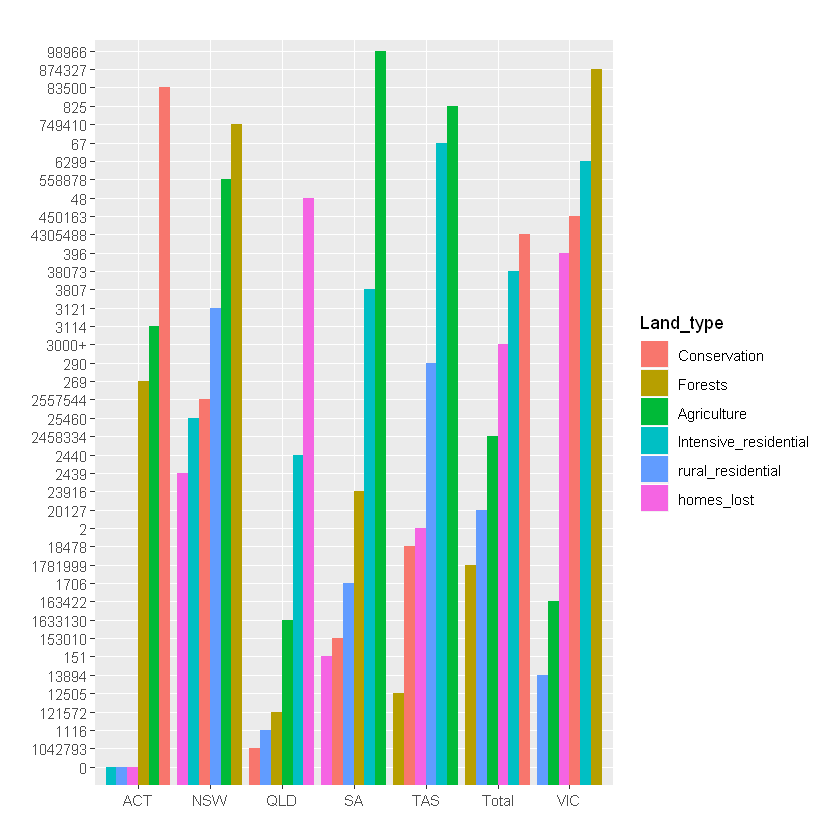

In [36]:
pd<-p + geom_bar(position = "dodge",
                 mapping= aes(y= value),stat= "identity") +
  labs(
    x = "",
    y = "",
    title = ""
     )
pd